This is a small financial data exercise I undertook, as described in p.163-4 of *Doing Data Science: Straight Talk from the Frontline* by O'Neil and Schutt. I used the pandas-matplotlib universe with the end goal of making incrementally more and more advanced stock prediction algorithms -- here, on almost 20 years' worth of Gamestop stock.

In [2]:
#standard packages to import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
#Get the Data: Go to Yahoo! Finance and download daily data from a stock that has at least eight years of data, 
#making sure it goes from earlier to later. If you don’t know how to do it, Google it.
old_gme = pd.read_csv("GME.csv") #I used my school Jupyter datahub to store this python notebook AND the GME.csv file

In [4]:
old_gme

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-02-13,9.625000,10.060000,9.525000,10.050000,6.766668,19054000
1,2002-02-14,10.175000,10.195000,9.925000,10.000000,6.733001,2755400
2,2002-02-15,10.000000,10.025000,9.850000,9.950000,6.699337,2097400
3,2002-02-19,9.900000,9.900000,9.375000,9.550000,6.430015,1852600
4,2002-02-20,9.600000,9.875000,9.525000,9.875000,6.648837,1723200
...,...,...,...,...,...,...,...
5114,2022-06-07,130.000000,149.889999,126.330002,146.500000,146.500000,6241900
5115,2022-06-08,141.389999,153.000000,135.830002,138.729996,138.729996,6118400
5116,2022-06-09,138.789993,139.899994,127.339996,128.979996,128.979996,3278600
5117,2022-06-10,126.000000,131.929993,123.139999,129.089996,129.089996,2955000


In [5]:
#Create the time series of daily log returns of the stock price.

#Definition of log returns: If F_t denotes the close value on day t, then the log return for that day is defined as log(F_t/F_(t-1))
#For convenience in computing edge cases, we will drop the 2002-02-13 element from any further matrices but calculate the log return for 2002-02-14 using it.

gme = old_gme.iloc[1:]
gme["Log Price Returns"] = np.log(gme['Close'].values/old_gme['Close'].values[:5118])
gme

/tmp/ipykernel_98/2510596122.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gme["Log Price Returns"] = np.log(gme['Close'].values/old_gme['Close'].values[:5118])


,Date,Open,High,Low,Close,Adj Close,Volume,Log Price Returns
1,2002-02-14,10.175000,10.195000,9.925000,10.000000,6.733001,2755400,-0.004988
2,2002-02-15,10.000000,10.025000,9.850000,9.950000,6.699337,2097400,-0.005013
3,2002-02-19,9.900000,9.900000,9.375000,9.550000,6.430015,1852600,-0.041031
4,2002-02-20,9.600000,9.875000,9.525000,9.875000,6.648837,1723200,0.033465
5,2002-02-21,9.840000,9.925000,9.750000,9.850000,6.632007,1744200,-0.002535
...,...,...,...,...,...,...,...,...
5114,2022-06-07,130.000000,149.889999,126.330002,146.500000,146.500000,6241900,0.134214
5115,2022-06-08,141.389999,153.000000,135.830002,138.729996,138.729996,6118400,-0.054496
5116,2022-06-09,138.789993,139.899994,127.339996,128.979996,128.979996,3278600,-0.072872
5117,2022-06-10,126.000000,131.929993,123.139999,129.089996,129.089996,2955000,0.000852


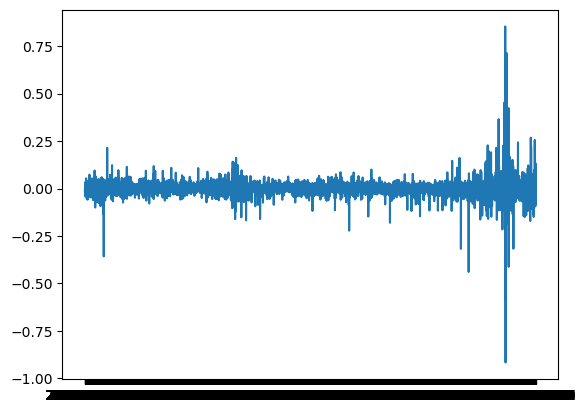

In [6]:
#Obviously we have to actually plot the log returns too
plt.plot(gme["Date"], gme["Log Price Returns"])

In [7]:
#Just for comparison, do the same for volume data 
#(i.e. create the time series of daily log changes in volume).
gme["Log Volume Returns"] = np.log(gme['Volume'].values/old_gme['Volume'].values[:5118])
gme

/tmp/ipykernel_98/835173887.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gme["Log Volume Returns"] = np.log(gme['Volume'].values/old_gme['Volume'].values[:5118])


,Date,Open,High,Low,Close,Adj Close,Volume,Log Price Returns,Log Volume Returns
1,2002-02-14,10.175000,10.195000,9.925000,10.000000,6.733001,2755400,-0.004988,-1.933714
2,2002-02-15,10.000000,10.025000,9.850000,9.950000,6.699337,2097400,-0.005013,-0.272864
3,2002-02-19,9.900000,9.900000,9.375000,9.550000,6.430015,1852600,-0.041031,-0.124108
4,2002-02-20,9.600000,9.875000,9.525000,9.875000,6.648837,1723200,0.033465,-0.072407
5,2002-02-21,9.840000,9.925000,9.750000,9.850000,6.632007,1744200,-0.002535,0.012113
...,...,...,...,...,...,...,...,...,...
5114,2022-06-07,130.000000,149.889999,126.330002,146.500000,146.500000,6241900,0.134214,0.962841
5115,2022-06-08,141.389999,153.000000,135.830002,138.729996,138.729996,6118400,-0.054496,-0.019984
5116,2022-06-09,138.789993,139.899994,127.339996,128.979996,128.979996,3278600,-0.072872,-0.623884
5117,2022-06-10,126.000000,131.929993,123.139999,129.089996,129.089996,2955000,0.000852,-0.103918


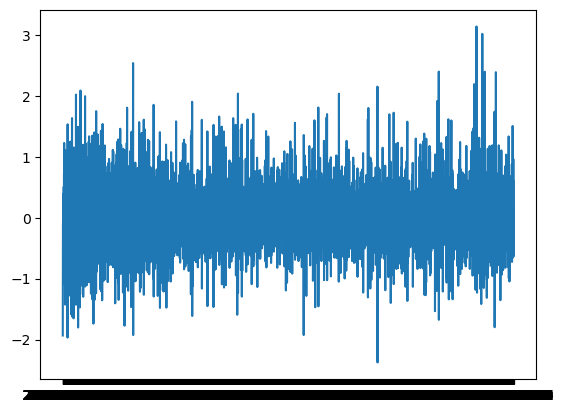

In [8]:
#Obviously we have to actually plot the log returns too
plt.plot(gme["Date"], gme["Log Volume Returns"])

In [9]:
#Next, try to set up a linear regression model that uses the past two returns to predict the next return. 
#Run it and see if you can make any money with it. 
#Try it for both stock returns and volumes.
from sklearn.linear_model import LinearRegression

In [10]:
#How to tease out the structure of the data: 
#Consider the problem of predicting the returns for the last day, 2022-06-13, of the dataframe.
#The first column we can use for prediction is "yesterday's return", for 2022-06-12
#The second column we can use for prediction is "the return from the day before yesterday", for 2002-06-11.
#Now consider the problem of, what is the EARLIEST day you can predict its returns for using its past two returns. 
#Suppose the earliest day is x. So "yesterday's return" column must start at day x-1 and "the return from the day before yesterday" must start at day x-2.
#Since the earliest returns in the entire dataset is 2002-02-13 (from old_gme, NOT gme!) we let x = 2002-02-15.

#More concretely, we can now define our columns exactly:
#All of the columns below must be sliced from the old_gme dataframe, NOT the gme dataframe.
#The Y_train column (see code block below for its reason) must stretch from 2002-02-15 to 2022-06-13 inclusive.
#The "returns from 1 day ago" column, which I can fit into X_train[0], stretches from 2002-02-14 to 2022-06-10 inclusive.
#The "returns from 2 days ago" column, which I can fit into X_train[1], stretches from 2002-02-13 to 2022-06-09.

#X_train = np.empty([5117, 2])
X_train_col0 = old_gme['Close'][1:5118]
X_train_col1 = old_gme['Close'][0:5117]
#the following code may be less than elegant but does work around the problem of naively merging the yesterday-column and day-before-yesterday column into a single DataFrame, which is that both columns automatically index to the old_gme index numbering, which causes at least one NaN in a gap.
X_train = np.array([[X_train_col0[rownum+1], X_train_col1[rownum]] for rownum in range(5117)])
Y_train = np.array(old_gme['Close'][2:5119])
Y_train

array([  9.95    ,   9.55    ,   9.875   , ..., 128.979996, 129.089996,
       118.25    ])

In [11]:
#This code block should be the last code block, after you have figured out what X_train and Y_train actually are.
lm = LinearRegression()
lm.fit(X_train, Y_train)
print(lm.coef_)
print(lm.intercept_)

[0.79610958 0.19536806]
0.3018395376030867


What do the coefficients tell us? A naive linear model of the form (today's predicted returns) = (coefficient1)(yesterday's returns) + (coefficient2)(day-before-yesterday returns) + (constant) will minimize its losses (more precisely, its averaged squared losses) by predicting (today's predicted returns) = 0.8(yesteday's returns) + 0.2(day-before-yesterday returns) + 0.3. For the GME stock at least.

A more intuitive interpretation? Losses will be minimized (at least by one metric and one linear function type) if you choose to base your returns around 4 ( = 0.8/0.2) times as much on yesterday's returns as on the returns from 2 days ago. Corollary: ...if you weigh yesterday's returns information around 4 times as heavily as the returns info from 2 days ago.

We can attempt to create a causal model, defined as (note the difference from how statisticians call causality?) a model that only predicts returns for a certain time using information that is actually available to the investor at that time. 
(This is a nontrivial definition because there is often some data that was technically produced shortly before a time that is not actually available to an investor at that time, often due to non-infinite communications speeds.)
However, looking up Yahoo! Finance's policy on data release lag, https://help.yahoo.com/kb/SLN2310.html, reveals that all markets' data are released with less than 30 minutes' lag, which is very small compared to the 1-day timeframes of our previous model.

So let's introduce two innovations to our price regression:
* Normalize for volatility (standard deviation)
* Put in an exponential decay for old data.


In [12]:
#Normalizing for volatility:

gme["NV Log Price Returns"] = (gme["Log Price Returns"].values - np.mean(gme["Log Price Returns"].values))/np.std(gme["Log Price Returns"].values)
gme["NV Log Volume Returns"] = (gme["Log Volume Returns"].values - np.mean(gme["Log Volume Returns"].values))/np.std(gme["Log Volume Returns"].values)
gme

/tmp/ipykernel_98/858142006.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gme["NV Log Price Returns"] = (gme["Log Price Returns"].values - np.mean(gme["Log Price Returns"].values))/np.std(gme["Log Price Returns"].values)
/tmp/ipykernel_98/858142006.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gme["NV Log Volume Returns"] = (gme["Log Volume Returns"].values - np.mean(gme["Log Volume Returns"].values))/np.std(gme["Log Volume Returns"].values)


,Date,Open,High,Low,Close,Adj Close,Volume,Log Price Returns,Log Volume Returns,NV Log Price Returns,NV Log Volume Returns
1,2002-02-14,10.175000,10.195000,9.925000,10.000000,6.733001,2755400,-0.004988,-1.933714,-0.116373,-3.761496
2,2002-02-15,10.000000,10.025000,9.850000,9.950000,6.699337,2097400,-0.005013,-0.272864,-0.116905,-0.530222
3,2002-02-19,9.900000,9.900000,9.375000,9.550000,6.430015,1852600,-0.041031,-0.124108,-0.883310,-0.240810
4,2002-02-20,9.600000,9.875000,9.525000,9.875000,6.648837,1723200,0.033465,-0.072407,0.701819,-0.140222
5,2002-02-21,9.840000,9.925000,9.750000,9.850000,6.632007,1744200,-0.002535,0.012113,-0.064185,0.024216
...,...,...,...,...,...,...,...,...,...,...,...
5114,2022-06-07,130.000000,149.889999,126.330002,146.500000,146.500000,6241900,0.134214,0.962841,2.845544,1.873908
5115,2022-06-08,141.389999,153.000000,135.830002,138.729996,138.729996,6118400,-0.054496,-0.019984,-1.169806,-0.038230
5116,2022-06-09,138.789993,139.899994,127.339996,128.979996,128.979996,3278600,-0.072872,-0.623884,-1.560816,-1.213150
5117,2022-06-10,126.000000,131.929993,123.139999,129.089996,129.089996,2955000,0.000852,-0.103918,0.007890,-0.201528


In [13]:
gme["NV Log Price Returns"][1]

-0.11637341495456219

In [14]:
#The decay factor given in "Doing Data Science" for volatility normalization is 0.97 so that is what I will start off with here.
#We will not do the smoothing recommended in the book, for brevity reasons.
#Our goal is to add a new column to the gme dataframe titled "EFNV", for "Expo Fitted Normalized Volatility"

#But what does EFNV actually represent? We might have to calculate this iteratively/recursively. 
#Great credit to the book Doing Data Science, pgs 154-156

#First doing the pg 156 pseudocode adaptation:
def exp_downweighter(series, s):
    #s = the decay factor
    N = 1.0/s
    true_N = N
    this_N_est = 1.0
    this_E = 0.0
    #may need to introduce another empty series to fill up and return?
    output_series_values = np.zeros(series.shape)
    for zero_indexed_idx in range(len(series)):
        #NASTY LITTLE PROBLEM: RANGE is ZERO-INDEXED BUT SERIES ARE 1-INDEXED
        this_E = this_E*(1-1/this_N_est) + (series.values[zero_indexed_idx])*(1/this_N_est)
        this_N_est = this_N_est*(1-1/true_N) + N*(1/true_N)
        output_series_values[zero_indexed_idx] = this_E
    return pd.Series(output_series_values)

    
    

gme["EFNV Log Price Returns"] = exp_downweighter(gme["NV Log Price Returns"], 0.97)
gme

/tmp/ipykernel_98/1896963293.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gme["EFNV Log Price Returns"] = exp_downweighter(gme["NV Log Price Returns"], 0.97)


,Date,Open,High,Low,Close,Adj Close,Volume,Log Price Returns,Log Volume Returns,NV Log Price Returns,NV Log Volume Returns,EFNV Log Price Returns
1,2002-02-14,10.175000,10.195000,9.925000,10.000000,6.733001,2755400,-0.004988,-1.933714,-0.116373,-3.761496,-0.116890
2,2002-02-15,10.000000,10.025000,9.850000,9.950000,6.699337,2097400,-0.005013,-0.272864,-0.116905,-0.530222,-0.860338
3,2002-02-19,9.900000,9.900000,9.375000,9.550000,6.430015,1852600,-0.041031,-0.124108,-0.883310,-0.240810,0.654955
4,2002-02-20,9.600000,9.875000,9.525000,9.875000,6.648837,1723200,0.033465,-0.072407,0.701819,-0.140222,-0.042611
5,2002-02-21,9.840000,9.925000,9.750000,9.850000,6.632007,1744200,-0.002535,0.012113,-0.064185,0.024216,-0.381209
...,...,...,...,...,...,...,...,...,...,...,...,...
5114,2022-06-07,130.000000,149.889999,126.330002,146.500000,146.500000,6241900,0.134214,0.962841,2.845544,1.873908,-1.052710
5115,2022-06-08,141.389999,153.000000,135.830002,138.729996,138.729996,6118400,-0.054496,-0.019984,-1.169806,-0.038230,-1.545573
5116,2022-06-09,138.789993,139.899994,127.339996,128.979996,128.979996,3278600,-0.072872,-0.623884,-1.560816,-1.213150,-0.038714
5117,2022-06-10,126.000000,131.929993,123.139999,129.089996,129.089996,2955000,0.000852,-0.103918,0.007890,-0.201528,-1.821372


Now we are going to plot EFNV Log Price Returns, of course, and for good measure plot all the intermediate metrics leading up to it. 

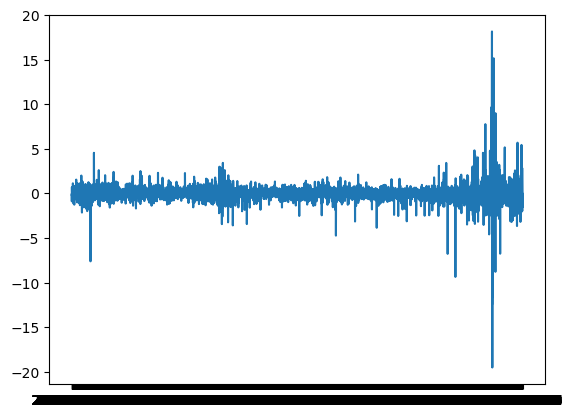

In [15]:
plt.plot(gme["Date"], gme["NV Log Price Returns"])

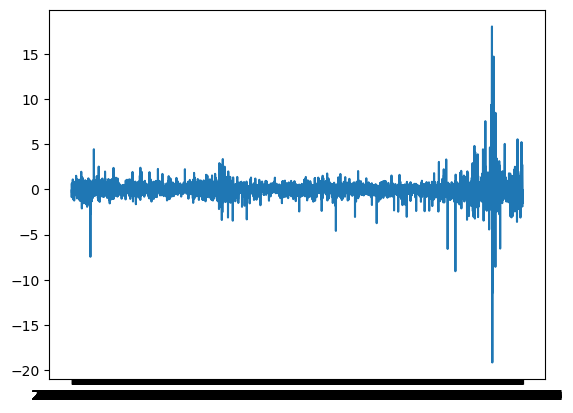

In [17]:
plt.plot(gme["Date"], gme["EFNV Log Price Returns"][:5118])

Now let's plot this with varying values of the decay rate.

In [ ]:
gme["EFNV Log Price Returns, 0.9"] = exp_downweighter(gme["NV Log Price Returns"], 0.9)
plt.plot(gme["Date"], gme["EFNV Log Price Returns, 0.9"])

/tmp/ipykernel_98/2092829028.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gme["EFNV Log Price Returns, 0.9"] = exp_downweighter(gme["NV Log Price Returns"], 0.9)


In [ ]:
gme["EFNV Log Price Returns, 0.5"] = exp_downweighter(gme["NV Log Price Returns"], 0.5)
plt.plot(gme["Date"], gme["EFNV Log Price Returns, 0.5"])